<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tools" data-toc-modified-id="Tools-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tools</a></span></li><li><span><a href="#Select-your-motif" data-toc-modified-id="Select-your-motif-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Select your motif</a></span></li><li><span><a href="#Check-the-motif's-point-symmetry" data-toc-modified-id="Check-the-motif's-point-symmetry-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check the motif's point symmetry</a></span></li><li><span><a href="#Select-the-global-pattern-symmetry" data-toc-modified-id="Select-the-global-pattern-symmetry-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Select the global pattern symmetry</a></span></li></ul></div>

In [82]:
import json, os
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tools

In [114]:
library = '../motif_library/'
motif_coords = None
motif_types = None
motif_symmetry = None
stabilizer = 'c1'

motif_selector = widgets.Dropdown(
    options=[f for f in os.listdir(library) if f.endswith('.json')],
    description='Motif',
    disabled=False,
    value=None
)

def on_motif_change(v):
    global motif_coords
    global motif_types
    global motif_symmetry
    info = json.load(open(library+v['new'], 'r'))
    motif_coords = info['coords'] 
    motif_types = info['types'] 
    motif_symmetry = info['symmetry'] 

motif_selector.observe(on_motif_change, names='value')

stabilizer_selector = widgets.ToggleButtons(
    options=['c1 (ignore)', 'Use motif'],
    description=r'$S(\mathcal{P}|M):$',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Do not extend any of motif\'s symmetry to the tiling', 'Use some of motif\'s symmetry in tiling'],
#     icons=['check'] * 3
)

def on_stabilizer_change(v):
    global stabilizer
    if v['new'] == "Use motif":
        stabilizer = motif_point_symmetry
    else:
        stabilizer = 'c1'

stabilizer_selector.observe(on_stabilizer_change, names='value')

def plot(coords):
    coords = np.array(coords)
    plt.plot(coords[:,0], coords[:,1], 'o')
    plt.gca().axis('equal')
    
def get_factors(x):
    f = []
    for i in range(1, x + 1):
        if x % i == 0:
            f.append(i)
    return f[:-1] # Exclude trivial factors of 1 and x

def get_subgroups(group):
    subgroups = []
    if (group == 'c1'): # Identity
        return subgroups
    elif (group.startswith("d")): # Dihedral group of order 2n (dn) 
        n = int(group.split("d")[1])
        subgroups += ["c{}".format(i) for i in get_factors(n)] + ["c{}".format(n)]
        subgroups += ["d{}".format(i) for i in get_factors(n)]
    elif (group.startswith("c")): # Cyclic group of order n (cn)
        n = int(group.split("c")[1]) 
        subgroups += ["c{}".format(i) for i in get_factors(n)]
    return subgroups

# Select your motif

In [3]:
display(motif_selector)

Dropdown(description='Motif', options=('d_1_vitruvian.json', 'c_1_random.json', 'd_inf_circle.json', 'd_6_hexa…

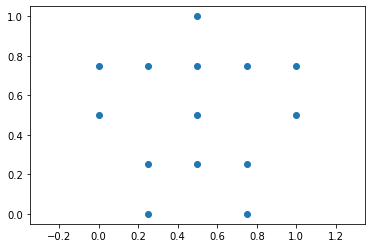

In [64]:
plot(motif_coords)

# Check the motif's point symmetry

You must have [pymatgen](https://pymatgen.org/index.html) installed for this to work, otherwise you can consider doing this manually and can skip ahead.

In [115]:
motif_point_symmetry = 'd2'

In [119]:
get_subgroups("c6")

['c1', 'c2', 'c3']

# Select the global pattern symmetry

In [103]:
display(stabilizer_selector)

ToggleButtons(button_style='info', description='$S(\\mathcal{P}|M):$', options=('c1 (ignore)', 'Use motif'), t…

In [135]:
stabilizer

'c1'

In [ ]:
always true that:
    safe = rows with S(P|M) == stabilizer
    dangerous = rows with subgroups of S(P|M) as stabilizer (incl c1), excluding forbidden    

In [131]:
# Table 5.2.3 from "Tilings and Patterns" by Gruenbaum & Shephard

pp01 = [
    'PP1',
    'p1',
    'c1',
    'Primitive',
    'c2',
    [1, 41]
]

pp02 = [
    'PP2',
    'pg',
    'c1',
    'Primitive',
    'd_inf',
    [2, 3, 43, 44]
]

In [132]:
df = pd.DataFrame(
    data=[pp01, pp02],
    columns=['Pattern Type', 
             'Symmetry Group '+r'$S(\mathcal{P})$', 
             'Induced Group, '+r'$S(\mathcal{P}|M)$',
             'Motif Transitive Proper Subgroups of '+r'$S(\mathcal{P})$',
             'Forbidden Supergroups',
             'Isohedral Tiling Type IH'
            ]
)

In [133]:
df.style.hide_index()

Pattern Type,Symmetry Group $S(\mathcal{P})$,"Induced Group, $S(\mathcal{P}|M)$",Motif Transitive Proper Subgroups of $S(\mathcal{P})$,Forbidden Supergroups,Isohedral Tiling Type IH
PP1,p1,c1,Primitive,c2,"[1, 41]"
PP2,pg,c1,Primitive,d_inf,"[2, 3, 43, 44]"
